# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images


### Importing necessary libraries


In [39]:
import numpy as np
import pandas as pd
from typing import Any
from cv2.typing import MatLike

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from modules.dataset import DATASET_DIR


DATASET = pd.read_csv(DATASET_DIR / "processed_features.csv")  # type: ignore
DATASET

,Unnamed: 0,class,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,0,81727.0,1277.342268,450,309,1.456311,1.701396,19.964067,11.908703,34.002182,31.302830,37.135154,52.397309,48.587146,56.215850,0.996028,0.761953,4.467605
1,1,0,63182.5,1044.222433,299,308,0.970779,1.457555,17.257951,10.291065,27.183708,24.439014,33.265607,50.000146,45.667846,36.882148,0.996775,0.812122,3.635309
2,2,0,41865.5,853.501653,252,286,0.881119,1.721513,17.400128,6.346512,14.238392,12.419464,30.428951,35.121102,31.686073,52.468895,0.995032,0.869674,2.473385
3,3,0,80654.0,1278.974738,290,454,0.638767,1.632405,20.281404,14.760899,40.399128,37.528046,38.338588,61.211987,57.728404,51.201324,0.995473,0.749504,4.584675
4,4,0,46703.5,902.991982,341,203,1.679803,1.482180,17.458960,7.181496,17.350441,15.027527,31.566327,39.210415,34.919648,54.483971,0.994960,0.850047,2.787591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,11265,6,734706.5,4299.195415,1492,1064,1.402256,2.160710,25.157095,22.378610,60.360793,35.885364,35.822001,77.384893,49.425561,70.144169,0.992512,0.656012,5.751697
11266,11266,6,736666.0,4292.433010,1504,1070,1.405607,2.184545,25.011309,11.623518,52.451780,18.846940,29.783763,68.616294,35.339912,78.042938,0.994138,0.657359,5.839736
11267,11267,6,710770.5,4293.763959,1483,1080,1.373148,2.253386,25.938624,20.295514,60.451395,33.638542,34.653623,79.346569,47.940769,63.080097,0.993008,0.669767,5.582181
11268,11268,6,857849.5,4406.734521,1510,1090,1.385321,1.918635,22.637198,26.035762,67.577379,35.522104,36.141104,75.852748,43.786954,57.757278,0.994447,0.612571,6.332063


In [41]:
Y = DATASET.iloc[:, 1:2]
Y

,class
0,0
1,0
2,0
3,0
4,0
...,...
11265,6
11266,6
11267,6
11268,6


In [42]:
X = DATASET.iloc[:, 2:]
X

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,81727.0,1277.342268,450,309,1.456311,1.701396,19.964067,11.908703,34.002182,31.302830,37.135154,52.397309,48.587146,56.215850,0.996028,0.761953,4.467605
1,63182.5,1044.222433,299,308,0.970779,1.457555,17.257951,10.291065,27.183708,24.439014,33.265607,50.000146,45.667846,36.882148,0.996775,0.812122,3.635309
2,41865.5,853.501653,252,286,0.881119,1.721513,17.400128,6.346512,14.238392,12.419464,30.428951,35.121102,31.686073,52.468895,0.995032,0.869674,2.473385
3,80654.0,1278.974738,290,454,0.638767,1.632405,20.281404,14.760899,40.399128,37.528046,38.338588,61.211987,57.728404,51.201324,0.995473,0.749504,4.584675
4,46703.5,902.991982,341,203,1.679803,1.482180,17.458960,7.181496,17.350441,15.027527,31.566327,39.210415,34.919648,54.483971,0.994960,0.850047,2.787591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,734706.5,4299.195415,1492,1064,1.402256,2.160710,25.157095,22.378610,60.360793,35.885364,35.822001,77.384893,49.425561,70.144169,0.992512,0.656012,5.751697
11266,736666.0,4292.433010,1504,1070,1.405607,2.184545,25.011309,11.623518,52.451780,18.846940,29.783763,68.616294,35.339912,78.042938,0.994138,0.657359,5.839736
11267,710770.5,4293.763959,1483,1080,1.373148,2.253386,25.938624,20.295514,60.451395,33.638542,34.653623,79.346569,47.940769,63.080097,0.993008,0.669767,5.582181
11268,857849.5,4406.734521,1510,1090,1.385321,1.918635,22.637198,26.035762,67.577379,35.522104,36.141104,75.852748,43.786954,57.757278,0.994447,0.612571,6.332063


### Train Test Split


In [43]:
from sklearn.model_selection import train_test_split  # type: ignore

In [44]:
X_train, X_test, y_train_, y_test_ = train_test_split(
    X, Y, test_size=0.3, random_state=142
)

In [45]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
626,58064.0,1119.587874,156,455,0.342857,1.222444,21.587851,9.119339,26.324635,22.388859,32.234113,49.883550,43.482857,57.668984,0.994449,0.803966,3.367254
2479,17341.0,563.754397,136,217,0.626728,1.701863,18.327606,4.426712,6.625584,5.310749,25.671068,26.776207,24.883492,29.683622,0.993681,0.943579,1.231868
8783,92363.0,1368.170696,455,350,1.300000,1.724175,20.266677,11.254105,42.566547,42.797279,36.987306,59.590391,59.615133,62.539247,0.995246,0.818415,4.307927
6788,13302.5,519.345233,196,114,1.719298,1.679684,20.275848,4.848843,7.041847,6.202660,26.929108,30.627480,28.698092,25.007311,0.991306,0.950178,1.068044
9383,111334.0,1347.955407,361,378,0.955026,1.225663,16.320116,18.677818,54.750484,47.383530,37.471701,67.020631,59.015751,57.745285,0.995375,0.719757,5.540780


In [46]:
y_train: np.ndarray[Any, np.dtype[np.int64]] = y_train_["class"].to_numpy()  # type: ignore
y_test: np.ndarray[Any, np.dtype[np.int64]] = y_test_["class"].to_numpy()  # type: ignore

### Feature Scaling


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [49]:
X_train[0:2]

array([[-0.33208034, -0.18257769, -0.6390128 ,  0.35770883, -1.34400004,
        -0.35848287,  0.04285772, -0.2134221 , -0.11476559, -0.01052599,
        -0.14816863,  0.02439646,  0.17095721,  1.07070512, -0.06270631,
        -0.39582182,  0.16828745],
       [-0.51515079, -0.69804105, -0.68968352, -0.59150638, -0.84804661,
        -0.02864656, -0.18737289, -0.51191533, -0.85950352, -0.84223789,
        -0.82457135, -1.25724674, -1.19348264, -0.44879684, -0.3822232 ,
         1.03654929, -1.0596995 ]])

In [50]:
y_train[0:2]

array([0, 1], dtype=int64)

### Applying Classifier model


In [51]:
from sklearn import svm

In [52]:
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [53]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 3, ..., 3, 4, 2], dtype=int64)

In [54]:
from sklearn import metrics

In [55]:
metrics.accuracy_score(y_test, y_pred)

0.968944099378882

In [56]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       505
           1       0.92      0.91      0.91       497
           2       0.99      0.98      0.98       510
           3       0.89      0.93      0.91       457
           4       0.98      0.97      0.97       459
           5       1.00      1.00      1.00       482
           6       1.00      1.00      1.00       471

    accuracy                           0.97      3381
   macro avg       0.97      0.97      0.97      3381
weighted avg       0.97      0.97      0.97      3381



### Performing parameter tuning of the model


In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
parameters = [
    {
        "kernel": ["rbf"],
        "gamma": [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
        "C": [1, 10, 100, 1000],
    },
    {
        "kernel": ["linear"],
        "C": [1, 10, 100, 1000],
    },
]

In [59]:
svm_clf = GridSearchCV(
    svm.SVC(decision_function_shape="ovr", probability=True), parameters, cv=5
)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [60]:
svm_clf.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [61]:
means = svm_clf.cv_results_["mean_test_score"]
stds = svm_clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, svm_clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.645 (+/-0.008) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.889 (+/-0.012) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.934 (+/-0.011) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.969 (+/-0.006) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.974 (+/-0.006) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.979 (+/-0.005) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.890 (+/-0.011) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.934 (+/-0.011) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.968 (+/-0.007) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.986 (+/-0.003) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.989 (+/-0.004) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.989 (+/-0.006) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.934 (+/-0.010) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.968 (+/-0.006) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.985 (+/-0.005) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.992 (+/-0.005) for {'C': 100, 'gamma': 0.1, 'kernel':

In [62]:
y_pred_svm = svm_clf.predict(X_test)

In [63]:
metrics.accuracy_score(y_test, y_pred_svm)

0.9899438036083998

In [64]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       505
           1       0.97      0.97      0.97       497
           2       1.00      1.00      1.00       510
           3       0.98      0.98      0.98       457
           4       0.99      0.98      0.98       459
           5       1.00      1.00      1.00       482
           6       1.00      1.00      1.00       471

    accuracy                           0.99      3381
   macro avg       0.99      0.99      0.99      3381
weighted avg       0.99      0.99      0.99      3381



### Dimensionality Reduction using PCA


In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA()

In [67]:
pca.fit(X)

PCA()

In [68]:
var = pca.explained_variance_ratio_
var

array([9.99995681e-01, 3.97896152e-06, 2.47800776e-07, 5.72397843e-08,
       2.36530041e-08, 5.38685736e-09, 3.82212831e-09, 1.58841066e-09,
       5.86250325e-10, 2.12619393e-10, 5.36092484e-11, 1.85570228e-11,
       2.97577725e-12, 1.71895874e-12, 8.24695851e-13, 2.87595848e-15,
       4.37005177e-17])

In [69]:
import matplotlib.pyplot as plt

%matplotlib inline

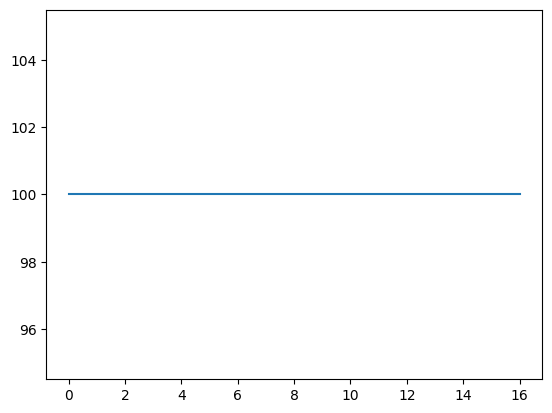

In [70]:
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
plt.plot(var1)

### Testing with mobile captured leaves which are not classified


In [71]:
import cv2
from modules.preprocess import subtract_background, NAMES, extract_features
from modules.dataset import UNIQUE_PLANTS

In [72]:
def get_features(img: MatLike):
    return pd.DataFrame.from_records(  # type: ignore
        [extract_features(0, img)], columns=NAMES
    ).iloc[:, 1:]


def predict(features: pd.DataFrame):
    prediction_probabilities: list[int] = list(
        svm_clf.predict_proba(  # type: ignore
            sc_X.transform(features)  # type: ignore
        )[0]
    )
    probability = sorted(prediction_probabilities)[-1]
    result = prediction_probabilities.index(probability)
    return result, probability

('Z', 0.9800694913634269)

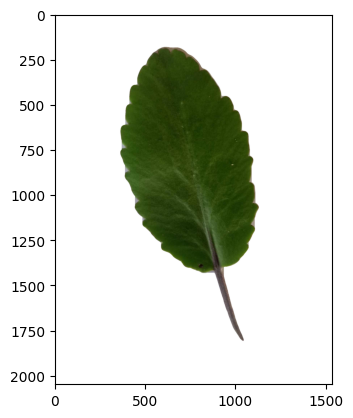

In [76]:
filename = r"D:\.R5-3600-Desktop\Documents\Code\ACLC-Butuan\Other\Herbal-Identification\5a36acaf-38d8-4499-b3b3-96f9db1322da.jpeg"

test_img = cv2.imread(filename)
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
img = subtract_background(img)

pred, prob = predict(get_features(img))

plt.imshow(img)
UNIQUE_PLANTS[pred], prob

('Z', 0.9929317386385207)

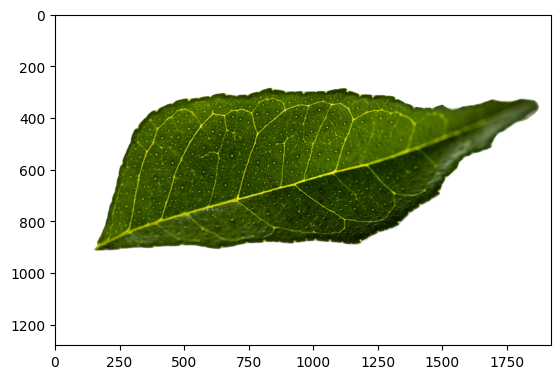

In [73]:
filename = r"D:\.R5-3600-Desktop\Documents\Code\ACLC-Butuan\Other\Herbal-Identification\test-image\curry leaf.jpg"

test_img = cv2.imread(filename)
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
img = subtract_background(img)

pred, prob = predict(get_features(img))

plt.imshow(img)
UNIQUE_PLANTS[pred], prob

('Z', 0.9605878364491424)

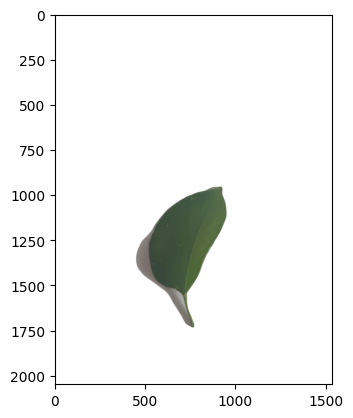

In [74]:
filename = r"D:\.R5-3600-Desktop\Documents\Code\ACLC-Butuan\Other\Herbal-Identification\test-image\Random\di9L7swF.jpg"
test_img = cv2.imread(filename)
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
img = subtract_background(img)

pred, prob = predict(get_features(img))

plt.imshow(img)
UNIQUE_PLANTS[pred], prob

('Z', 0.9818067048754251)

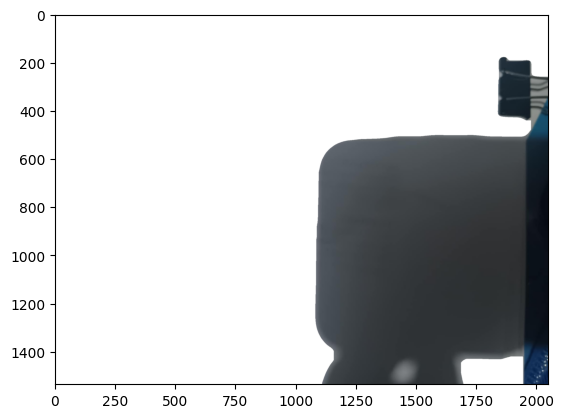

In [75]:
filename = r"D:\.R5-3600-Desktop\Documents\Code\ACLC-Butuan\Other\Herbal-Identification\test-image\Random\_dP5tf2C.jpg"
test_img = cv2.imread(filename)
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
img = subtract_background(img)

pred, prob = predict(get_features(img))

plt.imshow(img)
UNIQUE_PLANTS[pred], prob